In [37]:

import pickle
import pandas as pd
from sklearn.calibration import calibration_curve
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [9]:


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [10]:


%cd /content/drive/MyDrive/mlops/mlops_part_2_progect/error_analyse



/content/drive/MyDrive/mlops/mlops_part_2_progect/error_analyse


In [38]:
data = pd.read_pickle('evaluate_validation.pkl')
data = pd.DataFrame(data)
data

,preds,labels,probs,x
0,1,1,"[0.011193472, 0.9888065]",If the goings-on occasionally become slim or p...
1,1,1,"[0.002089133, 0.9979108]",Likely to be one of the most shocking and edif...
2,1,1,"[0.0020111306, 0.9979888]","On its simplest and most satisfying level, Lon..."
3,1,1,"[0.0057218196, 0.9942782]",I never saw it as the black comedy Kim [Ki-duh...
4,1,1,"[0.0002624987, 0.99973744]","This is a wonderfully baroque, gleeful subvers..."
...,...,...,...,...
85422,1,1,"[0.10492974, 0.89507025]","Lohan has star power in spades, and enough goi..."
85423,1,1,"[0.039955977, 0.96004397]",So begins the dance for Patrice Leconte's film...
85424,0,0,"[0.9919584, 0.0080415895]","It all goes on and on, and becomes excessively..."
85425,1,1,"[0.0042088795, 0.9957911]",[A] watchable fly-on-the-wall documentary.


In [39]:
prediction_ = data["probs"]. tolist()
prediction=[]

In [40]:
for i in range(len(prediction_)):
  prediction.append(prediction_[i][1])


In [41]:

y, x = calibration_curve(data["labels"]. tolist(), prediction, n_bins=10)

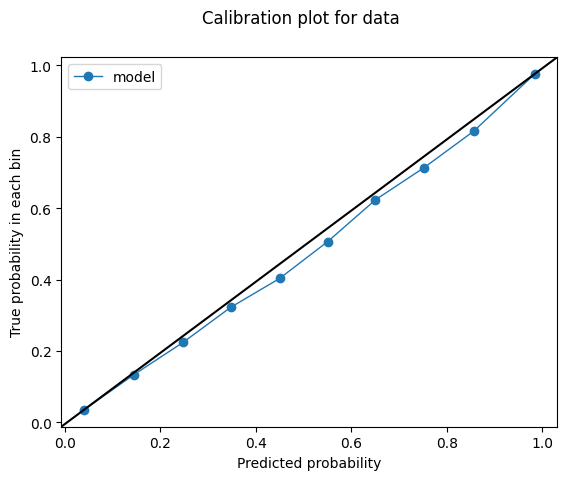

In [45]:

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(x,y, marker='o', linewidth=1, label='model')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()